/home/remko/.local/lib/python3.6/site-packages/matplotlib/axes/_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


<Figure size 1280x1520 with 0 Axes>

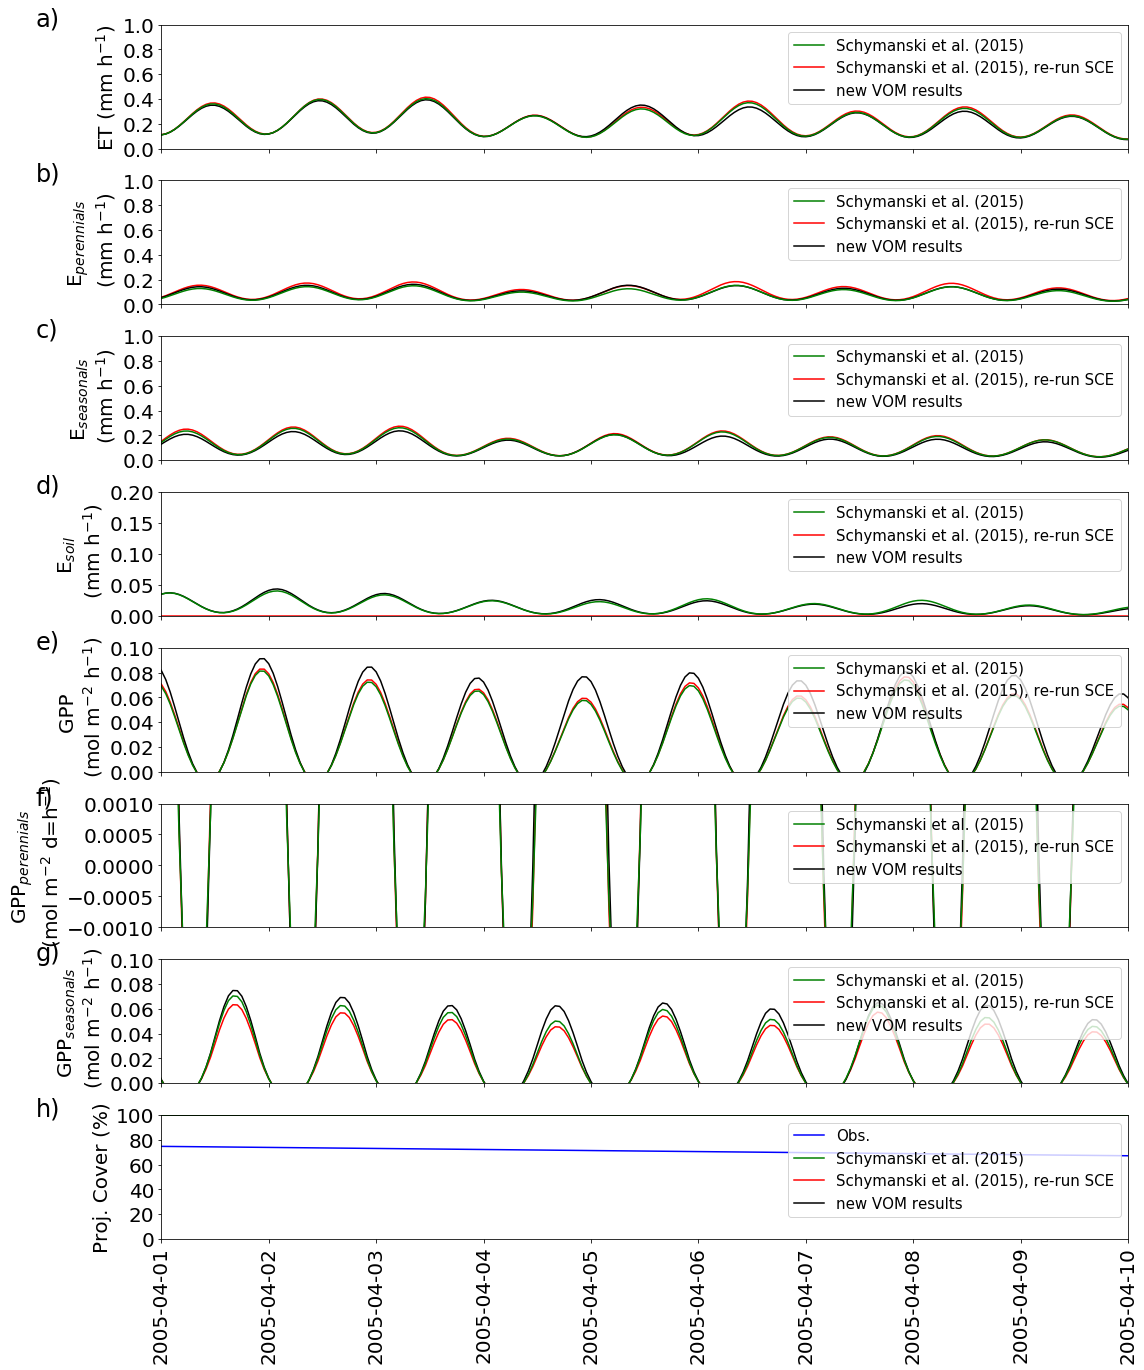

In [127]:
%run ../../src_py/plot_timeseries.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/2_sce_check/sce_best/results_hourly.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_hourly.txt \
--var "evaptot" "etmt" "etmg" "esoil" "asstot" "asst" "assg" "pc" \
-ys 2005 -ye 2005 -ds 1 -de 10 -ms 4 -me 4 \
-w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultshourly.txt \
--pcobs ../../data/fPAR/fpar_howard_v5.txt \
--ymax 1 1 1 0.2 0.1  0.0 0.1 100 \
--ymin 0 0 0 0 0 0 0 0 \
--pcobsdates ../../data/fPAR/dates_v5 --labels VOM  --legend True \
--xloc_title -0.13 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors red black gray \
--labels "Schymanski et al. (2015), re-run SCE" "new VOM results" "re-run SCE2" \
--figsize 16 19 --hpad -2 --sharex --labelsize 20 --hourly 


<Figure size 1280x960 with 0 Axes>

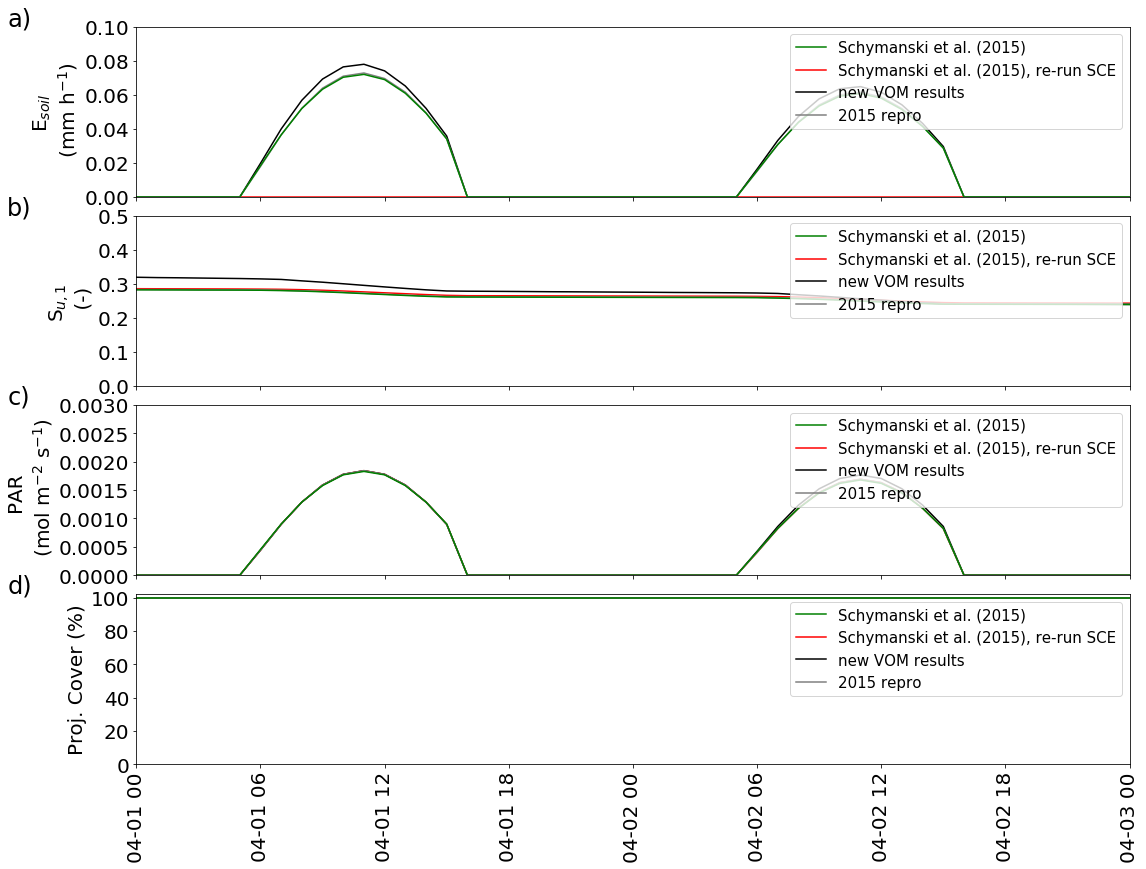

In [129]:
%run ../../src_py/plot_timeseries.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/2_sce_check/sce_best/results_hourly.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_hourly.txt \
../../data/VOM_output/additional_analyses/comp2015/1_benchmark_repr/results_hourly.txt \
--var "esoil" "su_1" "par" "pc"\
-ys 2005 -ye 2005 -ds 1 -de 3 -ms 4 -me 4 \
-w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultshourly.txt \
--ymax 0.1 0.5 0.003 102 0.2 0.1  0.0 0.1 100 \
--ymin 0 0 0 0 0 0 0 0 \
--pcobsdates ../../data/fPAR/dates_v5 --labels VOM  --legend True \
--xloc_title -0.13 --yloc_title 1.05 --size_title 24  --colors red black gray \
--labels "Schymanski et al. (2015), re-run SCE" "new VOM results" "2015 repro" \
--figsize 16 12 --hpad 0 --sharex --labelsize 20 --hourly 


In [35]:
par_h = 0.0015
srad2par_h = 2.0699
l_E_ = 2.45
rho_wat = 1000
i_trans_vegcov = 0.2
pc = 1
su__ = 0.3


esoil__  = (par_h /(srad2par_h * l_E_* rho_wat) ) * (1.0 - (1.0-i_trans_vegcov) * (pc)) * su__

print(esoil__)

esoil__  = 0.0002 * (1.0 - 0.8 * (pc )) * par_h * su__

print(esoil__)

1.7747086273516115e-08
1.7999999999999992e-08


In [47]:
data_tmp = np.genfromtxt("../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultshourly.txt", names=True)

p_E = 2.7182818
p_R_ = 8.314
ca_h = 317 * 10.0**-6
i_rlratio = 0.07

date2015 = []
for iday in range(0,len(data_tmp["day"])):
    date_tmp = datetime(int(data_tmp["year"][iday]),int(data_tmp["month"][iday]),int(data_tmp["day"][iday]), int(data_tmp["hour"][iday]-1))
    date2015.append(date_tmp)
        
        
data2015 = pd.DataFrame(index=date2015, columns=["esoil", "par", "pc", "su_1", "esoil_calc"])

data2015["esoil"] = data_tmp["esoil"]*1000 #mm/hr
data2015["par"] = data_tmp["par"]
data2015["su_1"] = data_tmp["su_1"]
data2015["pc"] = data_tmp["pc"]
data2015["jmax25g"] = data_tmp["jmax25_g"]
data2015["jmax25t"] = data_tmp["jmax25_t"]

data2015["gammastar"] = 0.00004275 * p_E ** ((18915.0 * (-25.0 + data_tmp["tair"])) 
               / (149.0 * p_R_ * (273.0 + data_tmp["tair"])))
data2015["rl"] = data_tmp["rl"]
#data2015["rlt"] = data_tmp["rl_t"]

data2015["rlg_calc"] = ((ca_h - data2015["gammastar"]) * (data2015["pc"]- 0.295371 ) * 1.0 * data2015["jmax25g"]    
                   * i_rlratio) / (4.0 * (ca_h + 2.0 * data2015["gammastar"]) 
                   * (1.0 + i_rlratio))
data2015["rlt_calc"] = ((ca_h - data2015["gammastar"]) * 0.295371 * 1.0 * data2015["jmax25t"]    
                   * i_rlratio) / (4.0 * (ca_h + 2.0 * data2015["gammastar"]) 
                   * (1.0 + i_rlratio))



In [48]:
data_tmp = np.genfromtxt("../../data/VOM_output/additional_analyses/comp2015/2_sce_check/sce_best/results_hourly.txt", names=True)

tmod = np.arange(datetime(int(data_tmp["fyear"][0]),int(data_tmp["fmonth"][0]),int(data_tmp["fday"][0]),int(data_tmp["nhour"][0]-1)), 
                          datetime(int(data_tmp["fyear"][-1]),int(data_tmp["fmonth"][-1]),int(data_tmp["fday"][-1]), int(data_tmp["nhour"][-1]-1))+timedelta(hours=1), 
                          timedelta(hours=1)).astype(datetime)

data = pd.DataFrame(index=tmod, columns=["esoil", "par", "pc", "su_1", "esoil_calc"])
data["esoil"] = data_tmp["esoil"]*1000 #mm/hr
data["par"] = data_tmp["par"]
data["su_1"] = data_tmp["su_1"]
data["pc"] = data_tmp["pc"]
data["jmax25g"] = data_tmp["jmax25g"]
data["jmax25t"] = data_tmp["jmax25t"]
data["gammastar"] = 0.00004275 * p_E ** ((18915.0 * (-25.0 + data_tmp["tair"])) 
               / (149.0 * p_R_ * (273.0 + data_tmp["tair"])))
data["rl"] = data_tmp["rl"]
#data["rlt"] = data_tmp["rlt"]


data["rlg_calc"] = ((ca_h - data["gammastar"]) * (data["pc"]-0.269724) * 1.0 * data["jmax25g"]    
                   * i_rlratio) / (4.0 * (ca_h + 2.0 * data["gammastar"]) 
                   * (1.0 + i_rlratio))
data["rlt_calc"] = ((ca_h - data["gammastar"]) * 0.269724 * 1.0 * data["jmax25t"]    
                   * i_rlratio) / (4.0 * (ca_h + 2.0 * data2015["gammastar"]) 
                   * (1.0 + i_rlratio))

In [49]:
data_tmp = np.genfromtxt("../../data/VOM_output/additional_analyses/comp2015/1_benchmark_repr/sce_best/results_hourly.txt", names=True)

tmod = np.arange(datetime(int(data_tmp["fyear"][0]),int(data_tmp["fmonth"][0]),int(data_tmp["fday"][0]),int(data_tmp["nhour"][0]-1)), 
                          datetime(int(data_tmp["fyear"][-1]),int(data_tmp["fmonth"][-1]),int(data_tmp["fday"][-1]), int(data_tmp["nhour"][-1]-1))+timedelta(hours=1), 
                          timedelta(hours=1)).astype(datetime)

data1 = pd.DataFrame(index=tmod, columns=["esoil", "par", "pc", "su_1", "esoil_calc"])
data1["esoil"] = data_tmp["esoil"]*1000 #mm/hr
data1["par"] = data_tmp["par"]
data1["su_1"] = data_tmp["su_1"]
data1["pc"] = data_tmp["pc"]
data1["jmax25g"] = data_tmp["jmax25g"]
data1["jmax25t"] = data_tmp["jmax25t"]
data1["rl"] = data_tmp["rl"]
#data1["rlt"] = data_tmp["rlt"]

data1["gammastar"] = 0.00004275 * p_E ** ((18915.0 * (-25.0 + data_tmp["tair"])) 
               / (149.0 * p_R_ * (273.0 + data_tmp["tair"])))

data1["rlg_calc"] = ((ca_h - data1["gammastar"]) * (data1["pc"]-0.295371) * 1.0 * data1["jmax25g"]    
                   * i_rlratio) / (4.0 * (ca_h + 2.0 * data1["gammastar"]) 
                   * (1.0 + i_rlratio))

data1["rlt_calc"] = ((ca_h - data["gammastar"]) * 0.295371 * 1.0 * data1["jmax25t"]    
                   * i_rlratio) / (4.0 * (ca_h + 2.0 * data1["gammastar"]) 
                   * (1.0 + i_rlratio))

In [123]:


data2015["esoil_calc"]  = 1000*3600*(data2015["par"]/(srad2par_h * l_E_* rho_wat) ) * (1.0 - (1.0-i_trans_vegcov) * (data2015["pc"][:])) * data2015["su_1"][:]
data["esoil_calc"]  = 1000*3600*(data["par"] /(srad2par_h * l_E_* rho_wat) ) * (1.0 - (1.0-i_trans_vegcov) * (data["pc"][:])) * data["su_1"][:]
data1["esoil_calc"]  = 1000*3600*(data1["par"] /(srad2par_h * l_E_* rho_wat) ) * (1.0 - (1.0-i_trans_vegcov) * (data1["pc"][:])) * data1["su_1"][:]

data2015[["esoil","esoil_calc"]] 

,esoil,esoil_calc
2000-01-01 00:00:00,0.000000,0.000000
2000-01-01 01:00:00,0.000000,0.000000
2000-01-01 02:00:00,0.000000,0.000000
2000-01-01 03:00:00,0.000000,0.000000
2000-01-01 04:00:00,0.000000,0.000000
2000-01-01 05:00:00,0.008903,0.008798
2000-01-01 06:00:00,0.033937,0.033660
2000-01-01 07:00:00,0.057780,0.057271
2000-01-01 08:00:00,0.078515,0.077771
2000-01-01 09:00:00,0.094994,0.094036


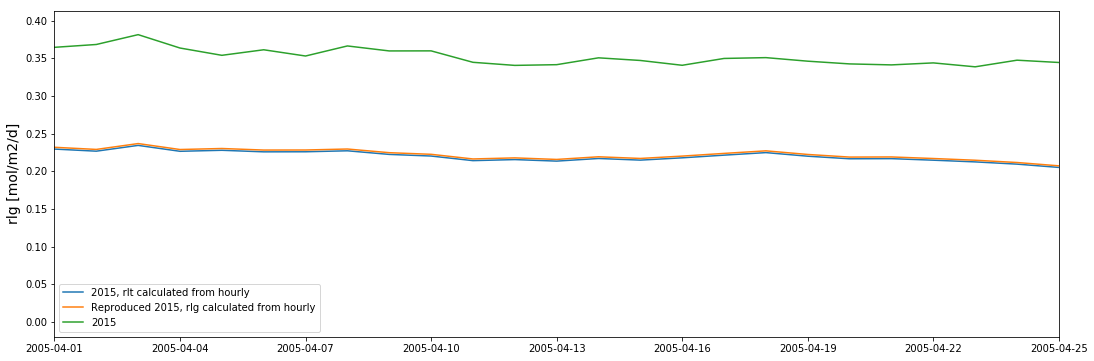

In [55]:
yearstart = 2005 
yearend = 2005 
daystart =  1 
dayend = 25 
monthstart = 4 
monthend = 4 


fig=plt.figure(figsize=(18, 6) )


#plt.plot(data2015.index, data2015["rlt_calc"], label = "2015, rlg calculated from hourly" )
plt.plot(data2015["rlg_calc"].resample("D").sum().index, data2015["rlg_calc"].resample("D").sum()*3600, label = "2015, rlt calculated from hourly" )

#plt.plot(data.index, data["esoil_calc"], label = "Re-run SCE, re-calculated from hourly" )
plt.plot(data1["rlg_calc"].resample("D").sum().index, data1["rlg_calc"].resample("D").sum()*3600, label = "Reproduced 2015, rlg calculated from hourly" )
#plt.plot(data1.index, data1["rlt_calc"], label = "Reproduced 2015, rlt calculated from hourly" )

plt.plot( data2015["rl"].resample("D").sum().index, data2015["rl"].resample("D").sum()*3600, label="2015")
#plt.plot(data.index, data["esoil"], label = "Re-run SCE")
#plt.plot(data1.index, data1["rl"], label = "Reproduced 2015")

plt.xlim([datetime(yearstart,monthstart, daystart), datetime( yearend, monthend, dayend)])
#plt.ylim([0, 0.2])
plt.ylabel("rlg [mol/m2/d]", size=14)

plt.legend()
plt.show()



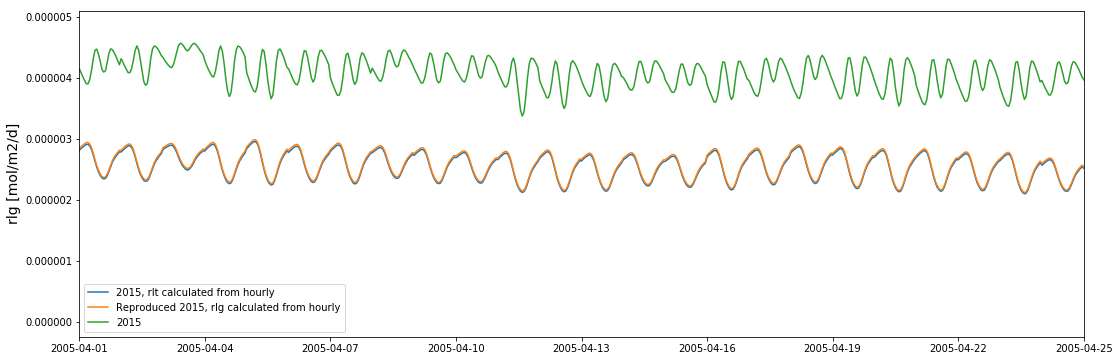

In [56]:
yearstart = 2005 
yearend = 2005 
daystart =  1 
dayend = 25 
monthstart = 4 
monthend = 4 


fig=plt.figure(figsize=(18, 6) )


#plt.plot(data2015.index, data2015["rlt_calc"], label = "2015, rlg calculated from hourly" )
plt.plot(data2015["rlg_calc"].index, data2015["rlg_calc"], label = "2015, rlt calculated from hourly" )

#plt.plot(data.index, data["esoil_calc"], label = "Re-run SCE, re-calculated from hourly" )
plt.plot(data1["rlg_calc"].index, data1["rlg_calc"], label = "Reproduced 2015, rlg calculated from hourly" )
#plt.plot(data1.index, data1["rlt_calc"], label = "Reproduced 2015, rlt calculated from hourly" )

plt.plot( data2015["rl"].index, data2015["rl"], label="2015")
#plt.plot(data.index, data["esoil"], label = "Re-run SCE")
#plt.plot(data1.index, data1["rl"], label = "Reproduced 2015")

plt.xlim([datetime(yearstart,monthstart, daystart), datetime( yearend, monthend, dayend)])
#plt.ylim([0, 0.2])
plt.ylabel("rlg [mol/m2/d]", size=14)

plt.legend()
plt.show()



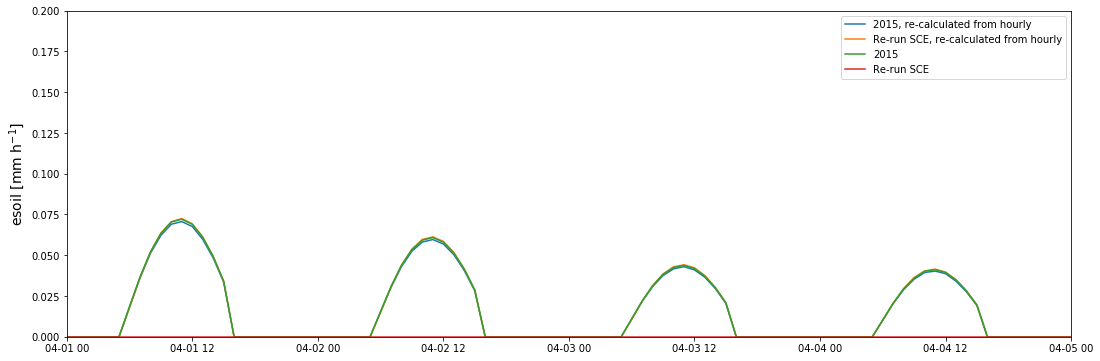

In [133]:
yearstart = 2005 
yearend = 2005 
daystart =  1 
dayend = 5 
monthstart = 4 
monthend = 4 


fig=plt.figure(figsize=(18, 6) )


plt.plot(data2015.index, data2015["esoil_calc"], label = "2015, re-calculated from hourly" )
plt.plot(data.index, data["esoil_calc"], label = "Re-run SCE, re-calculated from hourly" )
#plt.plot(data.index, data1["esoil_calc"], label = "Reproduced 2015, re-calculated from hourly" )

plt.plot(data2015.index, data2015["esoil"], label="2015")
plt.plot(data.index, data["esoil"], label = "Re-run SCE")
#plt.plot(data1.index, data1["esoil"], label = "Reproduced 2015")

plt.xlim([datetime(yearstart,monthstart, daystart), datetime( yearend, monthend, dayend)])
plt.ylim([0, 0.2])
plt.ylabel("esoil [mm h$^{-1}$]", size=14)

plt.legend()
plt.show()



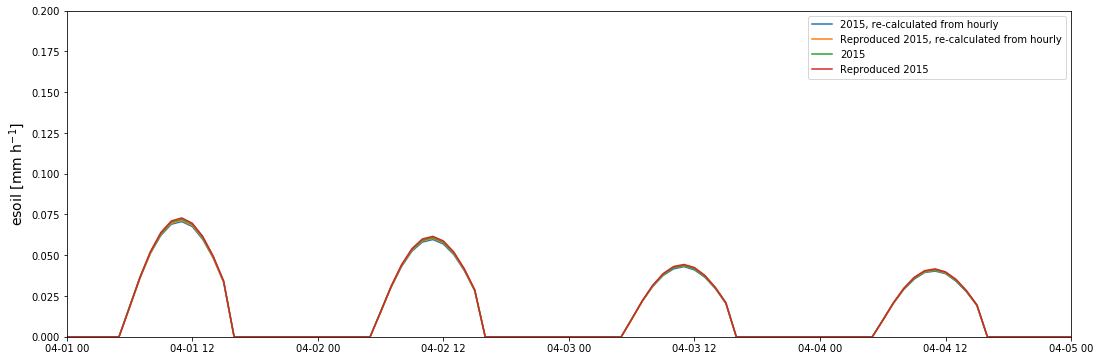

In [134]:
yearstart = 2005 
yearend = 2005 
daystart =  1 
dayend = 5 
monthstart = 4 
monthend = 4 


fig=plt.figure(figsize=(18, 6) )


plt.plot(data2015.index, data2015["esoil_calc"], label = "2015, re-calculated from hourly" )
#plt.plot(data.index, data["esoil_calc"], label = "Re-run SCE, re-calculated from hourly" )
plt.plot(data.index, data1["esoil_calc"], label = "Reproduced 2015, re-calculated from hourly" )

plt.plot(data2015.index, data2015["esoil"], label="2015")
#plt.plot(data.index, data["esoil"], label = "Re-run SCE")
plt.plot(data1.index, data1["esoil"], label = "Reproduced 2015")

plt.xlim([datetime(yearstart,monthstart, daystart), datetime( yearend, monthend, dayend)])
plt.ylim([0, 0.2])
plt.ylabel("esoil [mm h$^{-1}$]", size=14)

plt.legend()
plt.show()



-0.06445171361419111
-0.06613931960926145
-0.08753166332827966
-0.06545196369536677
-0.056767672859208806
-0.08657564725606459
-0.06575737417619787
-0.032970880841949324
-0.08371145573429617
0.10437439353841338
-0.05559984206917999
-0.039014365933135106
0.16098988158005123
0.1286434582721927


<Figure size 1280x800 with 0 Axes>

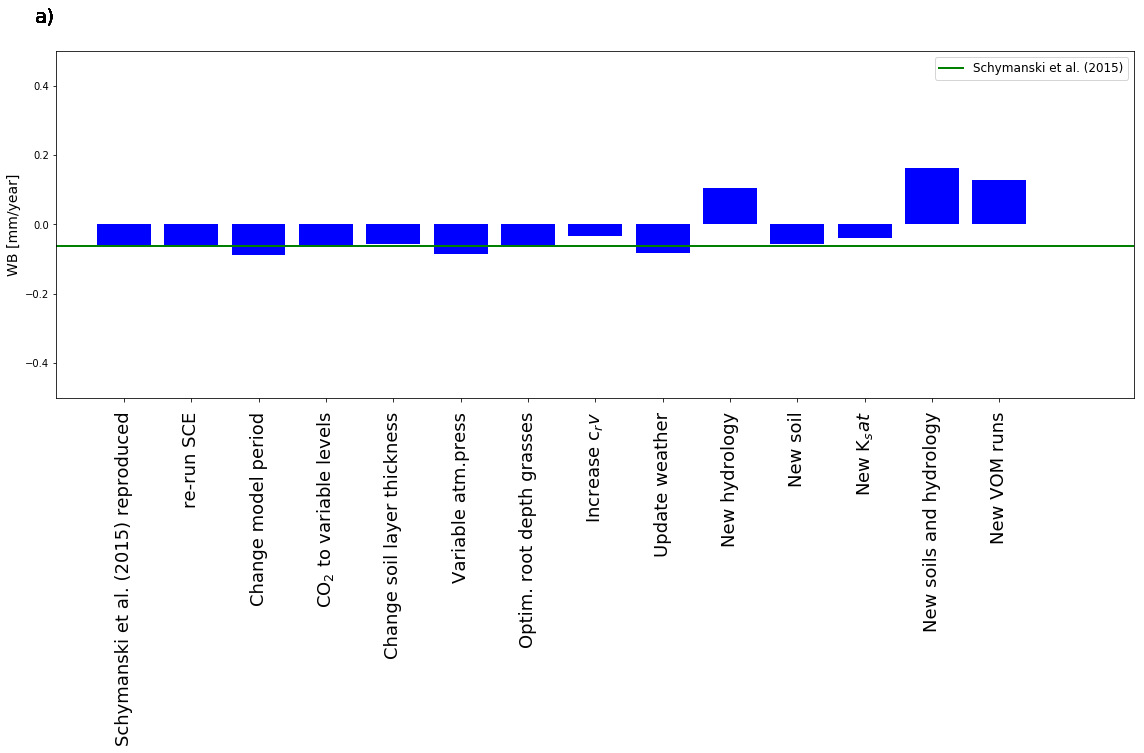

In [20]:
%run ../../src_py/plot_mass_balance.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/1_benchmark_repr/results_daily.txt \
../../data/VOM_output/additional_analyses/comp2015/2_sce_check/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/comp2015/3_modeltime/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/comp2015/4_co2_var/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/comp2015/5_sdelz/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/comp2015/6_atm/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/comp2015/7_rgdepth/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/comp2015/8_cpcff/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/comp2015/9_weather/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/comp2015/10_hydro/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/comp2015/11_soil/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/comp2015/12_ksat/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/comp2015/13_soilprofile_hydro/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--var "evaptot" "rain" "etmt" "etmg" "esoil"  "infx" "asstot" "asst" "assg" "spgfcf" \
"jmax25t" "jmax25g" "lambdat" "lambdag" "rrt" "rrg" "tct" "tcg" \
"cpcct_d" "cpccg_d" "ncp_t" "ncp_g" \
-ys 2001 -ye 2006 \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--ymax 0.5 1000 1000 300 250 150 150 1000 0.2 0.2 \
-1000 1500000 10 10 0.0002 0.0002 0.001 0.001 100 100 100\
--ymin -0.5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0  \
--pcobsdates ../../data/fPAR/dates_v5 --legend True \
--xloc_title -0.02 --yloc_title 1.1 --size_title 20 --moving_average 7  \
--ticklabels "Schymanski et al. (2015) reproduced" \
"re-run SCE" "Change model period" \
"CO$_2$ to variable levels" "Change soil layer thickness" "Variable atm.press" \
"Optim. root depth grasses" "Increase c$_rv$" \
"Update weather" "New hydrology" "New soil" "New K$_sat$"  \
"New soils and hydrology" "New VOM runs"\
--figsize 16 10 --hpad 0 --sharex --labelsize 14 --label_pad 10 \
--yticksize 16


<Figure size 1280x1520 with 0 Axes>

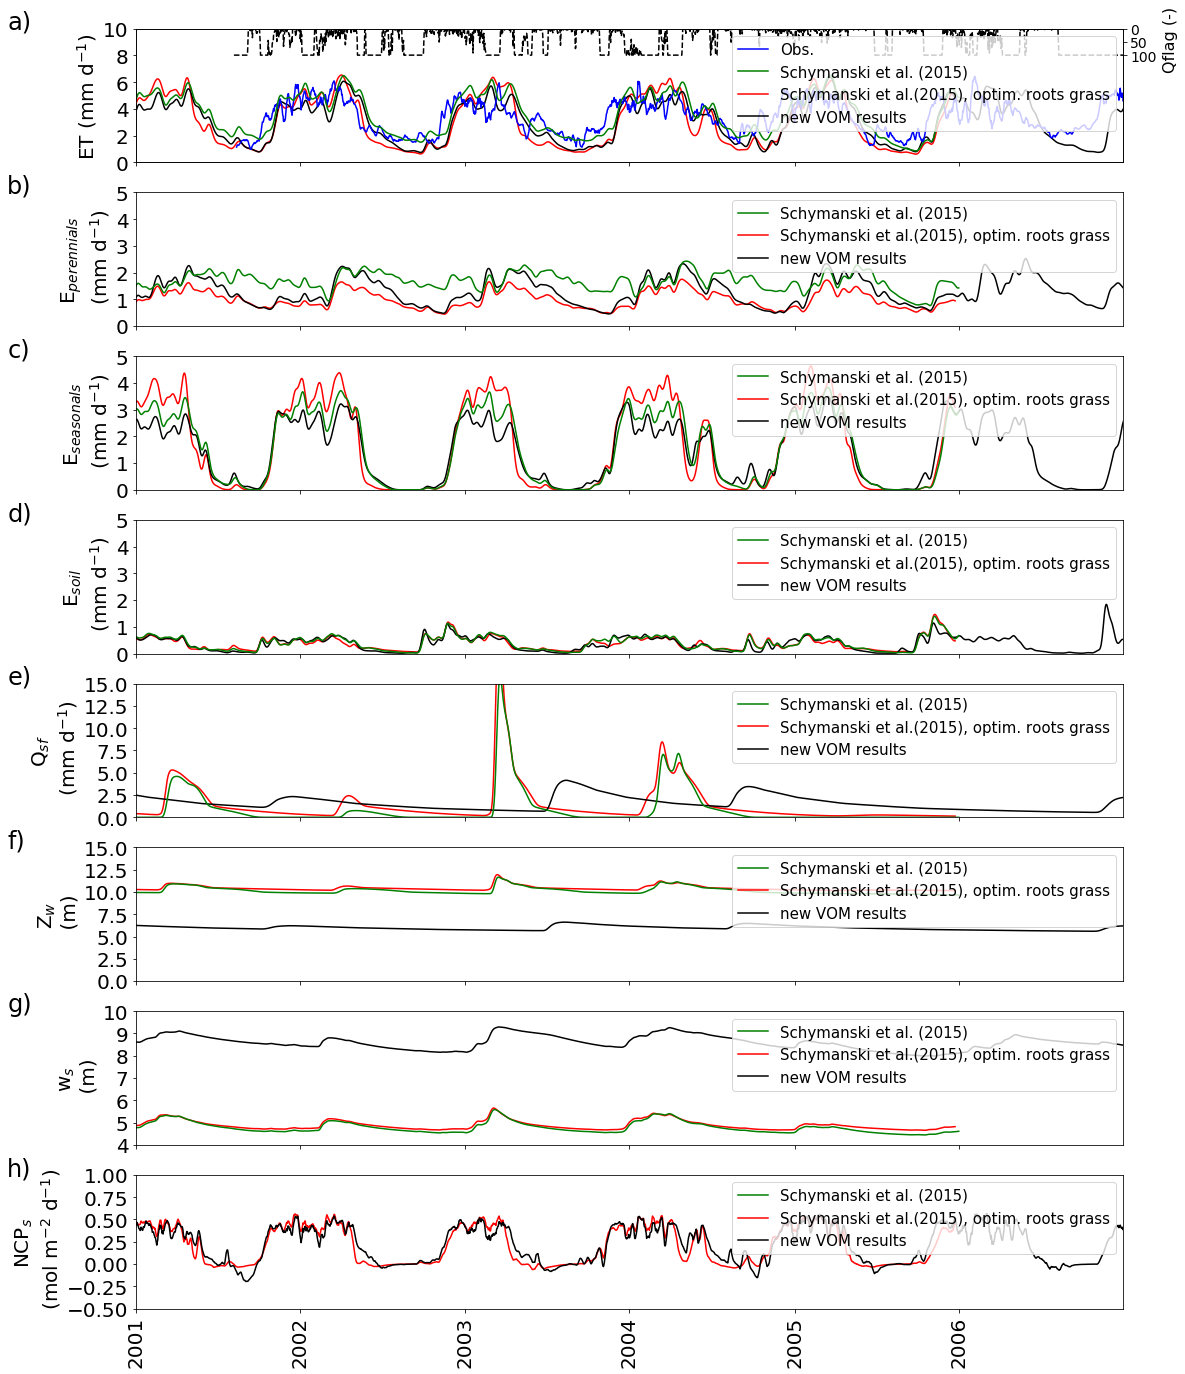

In [45]:
%run ../../src_py/plot_timeseries.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/7_rgdepth/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--var "evaptot" "etmt" "etmg" "esoil" "spgfcf" "zw" "ws" "ncp_g"\
-ys 2001 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--eobs_qc ../../data/DINGO_QC/FeQ_howard.txt --eobs ../../data/DINGO/Ea_howard.txt \
--ymax 10 5 5 5 15 15.0 10 1 \
--ymin 0 0 0 0 0 0 4 -0.50 \
--pcobsdates ../../data/fPAR/dates_v5 --labels VOM  --legend True \
--xloc_title -0.13 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors red black gray \
--labels "Schymanski et al.(2015), optim. roots grass" "new VOM results" \
--figsize 16 19 --hpad 0 --sharex --labelsize 20

<Figure size 1280x400 with 0 Axes>

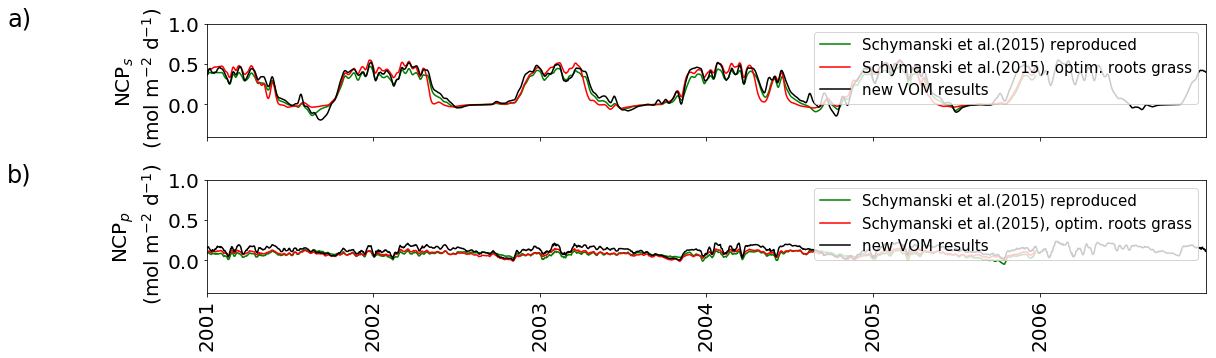

In [48]:
%run ../../src_py/plot_timeseries.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/1_benchmark_repr/results_daily.txt \
../../data/VOM_output/additional_analyses/comp2015/7_rgdepth/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--var "ncp_g" "ncp_t" \
-ys 2001 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--ymax 1  1\
--ymin -0.4 -0.4\
--pcobsdates ../../data/fPAR/dates_v5 --labels VOM  --legend True \
--xloc_title -0.2 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors green red black gray \
--labels "Schymanski et al.(2015) reproduced"  "Schymanski et al.(2015), optim. roots grass"  "new VOM results" \
--figsize 16 5 --hpad 2 --sharex --labelsize 20

<Figure size 1280x1520 with 0 Axes>

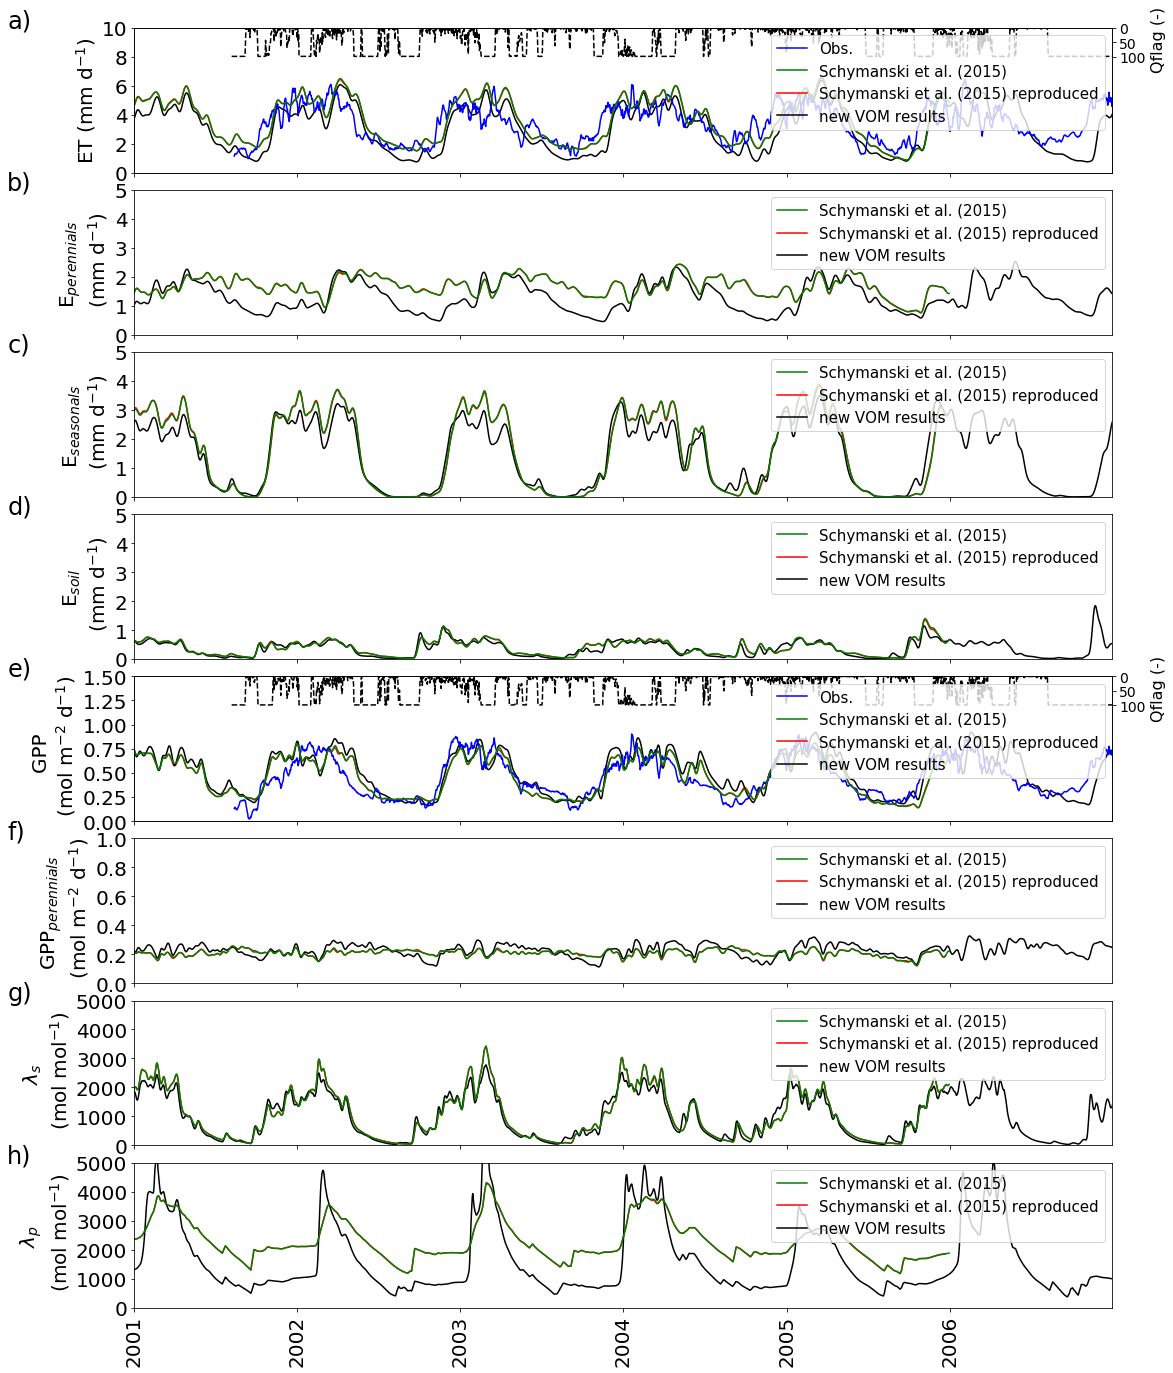

In [2]:
%run ../../src_py/plot_timeseries.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/1_benchmark_repr/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--var "evaptot" "etmt" "etmg" "esoil" "asstot" "asst" "lambdag" "lambdat" \
-ys 2001 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--assobs ../../data/DINGO/GPPdaily_howard.txt --assobs_qc ../../data/DINGO_QC/FcQ_howard.txt \
--eobs_qc ../../data/DINGO_QC/FeQ_howard.txt --eobs ../../data/DINGO/Ea_howard.txt \
--ymax 10 5 5 5 1.5 1.0 5000 5000 \
--ymin 0 0 0 0 0 0 0 0 \
--pcobsdates ../../data/fPAR/dates_v5 --labels VOM  --legend True \
--xloc_title -0.13 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors red black gray \
--labels "Schymanski et al. (2015) reproduced" "new VOM results" \
--figsize 16 19 --hpad -2 --sharex --labelsize 20


<Figure size 1280x1520 with 0 Axes>

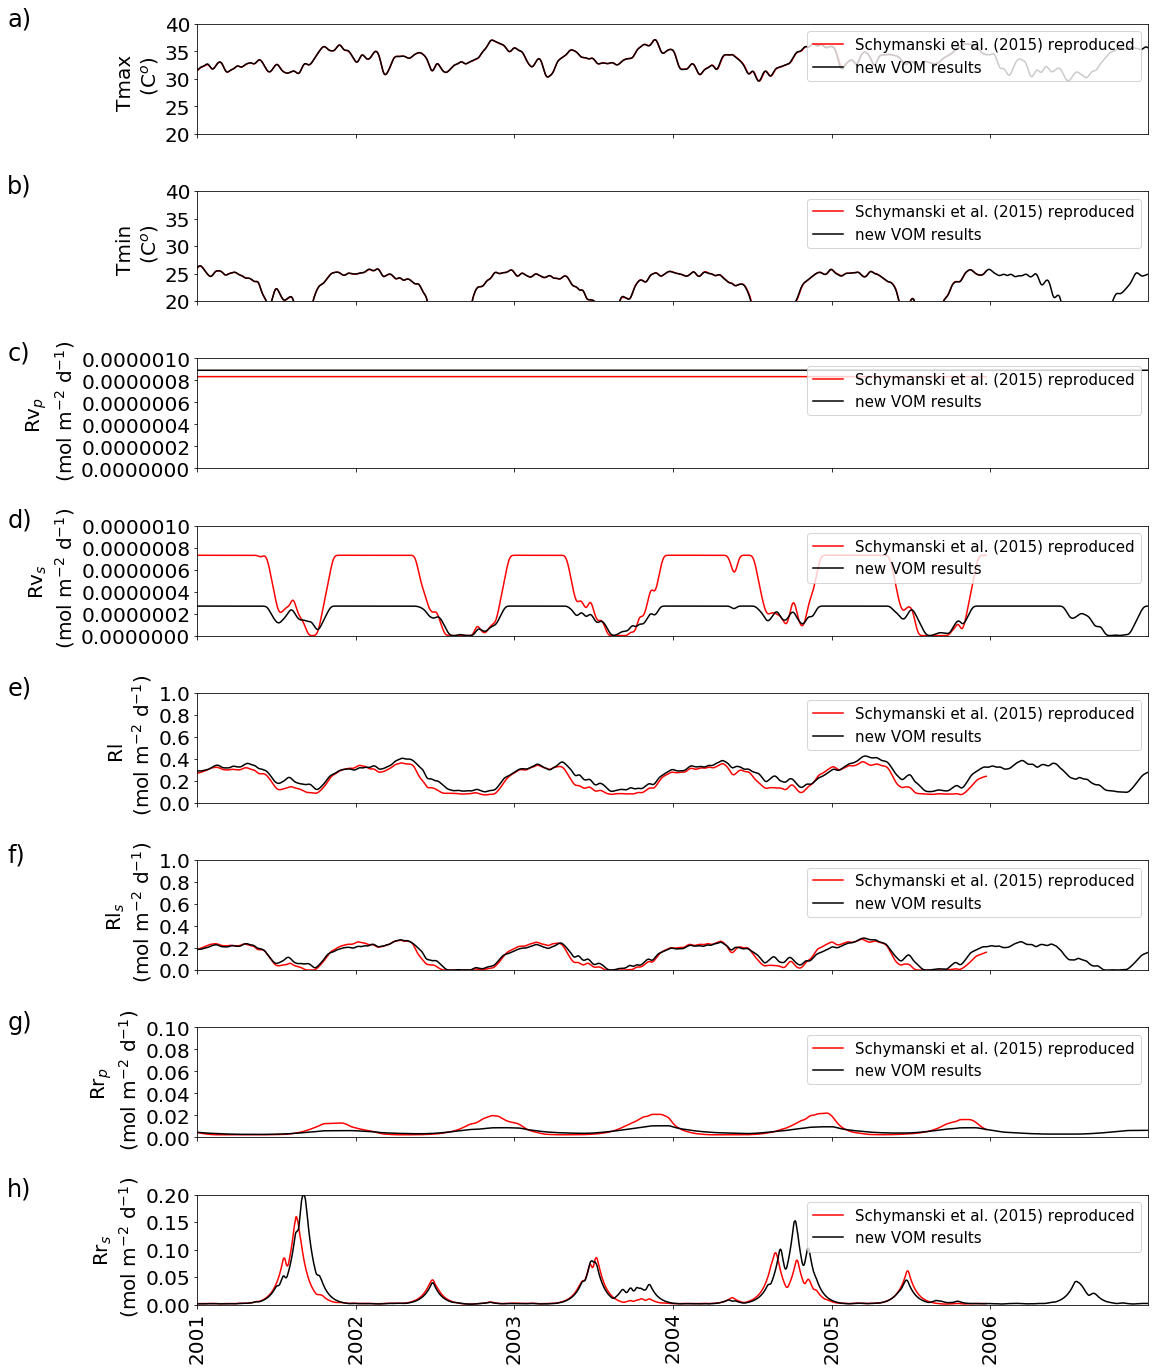

In [59]:
%run ../../src_py/plot_timeseries.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/1_benchmark_repr/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--var "tairmax" "tairmin" "cpcct_d" "cpccg_d"  "rl" "rlg"  "rrt" "rrg"   \
-ys 2001 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--ymax 40 40 0.000001 0.000001 1 1 0.1 0.2 \
--ymin 20 20 0 0 0 0 0 0 0 0 \
--pcobsdates ../../data/fPAR/dates_v5 --labels VOM  --legend True \
--xloc_title -0.2 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors red black gray \
--labels "Schymanski et al. (2015) reproduced" "new VOM results" \
--figsize 16 19 --hpad 2 --sharex --labelsize 20


<Figure size 1280x1520 with 0 Axes>

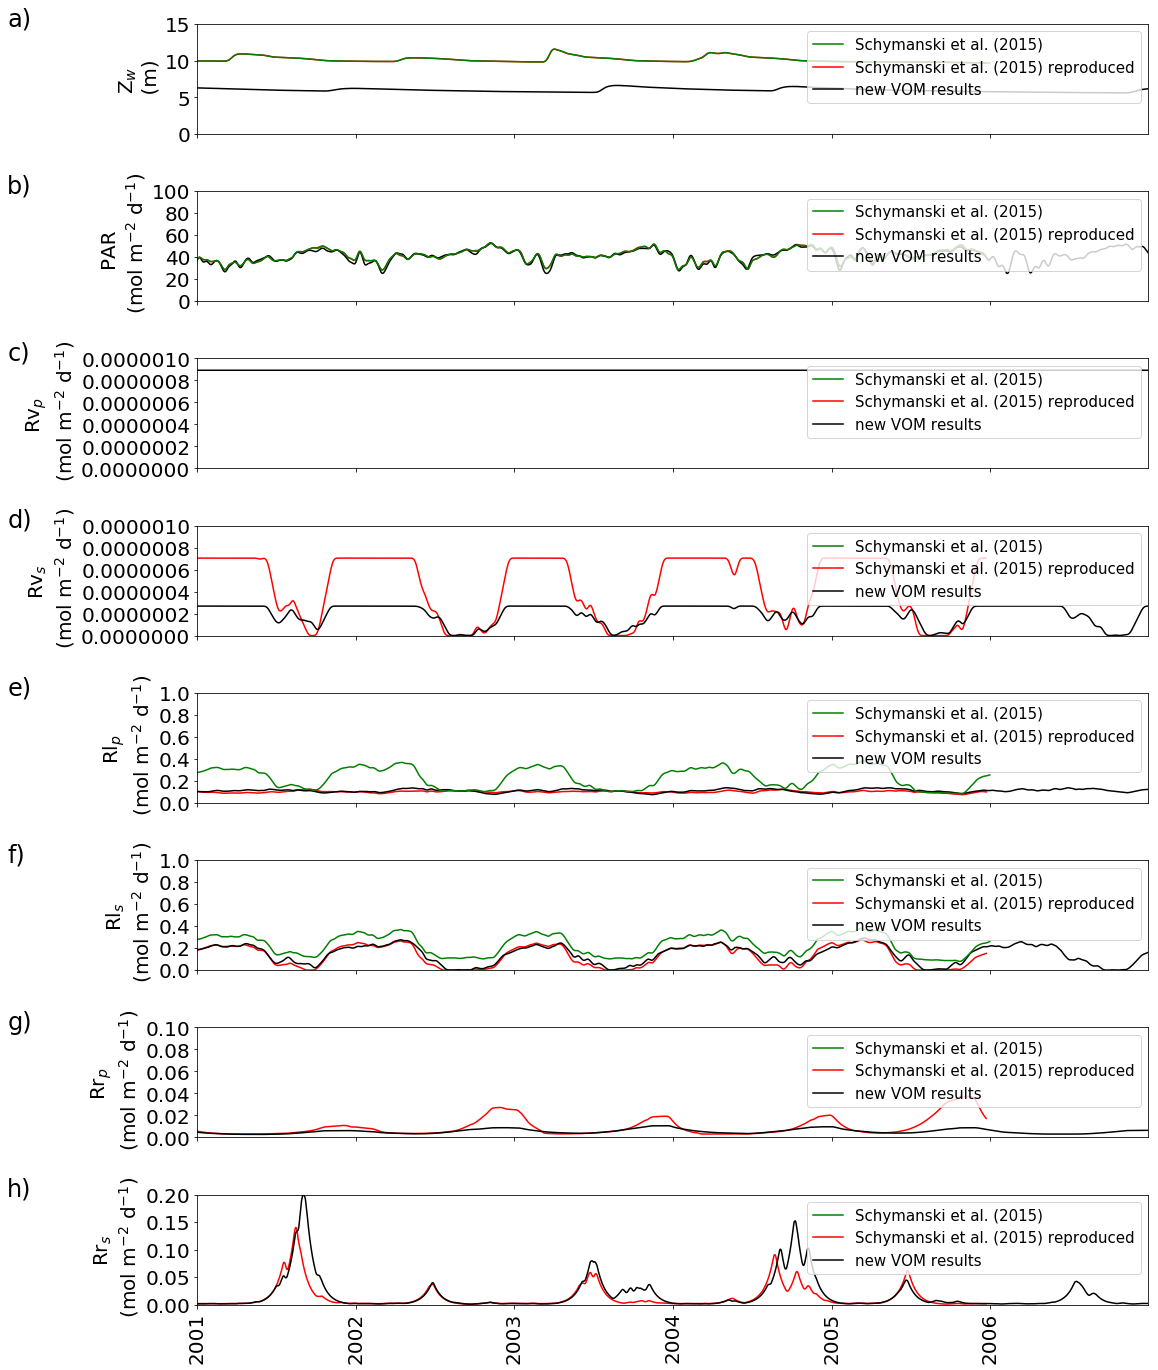

In [60]:
%run ../../src_py/plot_timeseries.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/1_benchmark_repr/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--var "zw" "par" "cpcct_d" "cpccg_d"  "rlt" "rlg"  "rrt" "rrg"   \
-ys 2001 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--ymax 15 100 0.000001 0.000001 1 1 0.1 0.2 \
--ymin 0 0 0 0 0 0 0 0 0 0 \
--pcobsdates ../../data/fPAR/dates_v5 --labels VOM  --legend True \
--xloc_title -0.2 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors red black gray \
--labels "Schymanski et al. (2015) reproduced" "new VOM results" \
--figsize 16 19 --hpad 2 --sharex --labelsize 20


In [100]:
data_tmp = np.genfromtxt("../../data/VOM_output/additional_analyses/comp2015/2_sce_check/sce/sce_out.txt")
data_tmp[:,0]

array([ 779.827     , 5000.        , 2500.        , ..., 1006.93195916,
       1006.93195916, 1006.93195916])

2914.14031614187

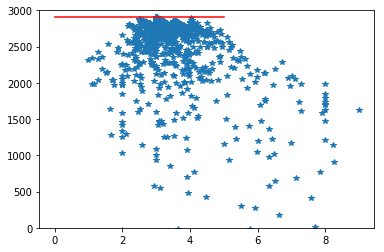

In [110]:

plt.plot(data_tmp[:,5], data_tmp[:,6], "*")
plt.plot([0,5], [max(data_tmp[:,6]),max(data_tmp[:,6])], "red")

plt.ylim(0,3000)
#plt.xlim(2,5)

max(data_tmp[:,6])


In [98]:
data_tmp2 = np.genfromtxt("../../data/VOM_output/additional_analyses/comp2015/0_benchmark/sce.out")


(0, 3000)

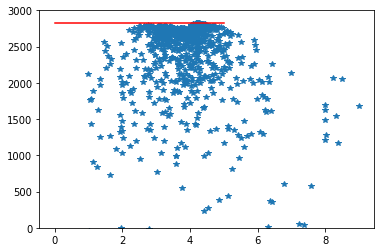

In [111]:
plt.plot(data_tmp2[:,5], data_tmp2[:,6], "*")
plt.plot([0,5], [max(data_tmp2[:,6]),max(data_tmp2[:,6])], "red")

plt.ylim(0,3000)
#plt.xlim(2,5)


/home/remko/.local/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


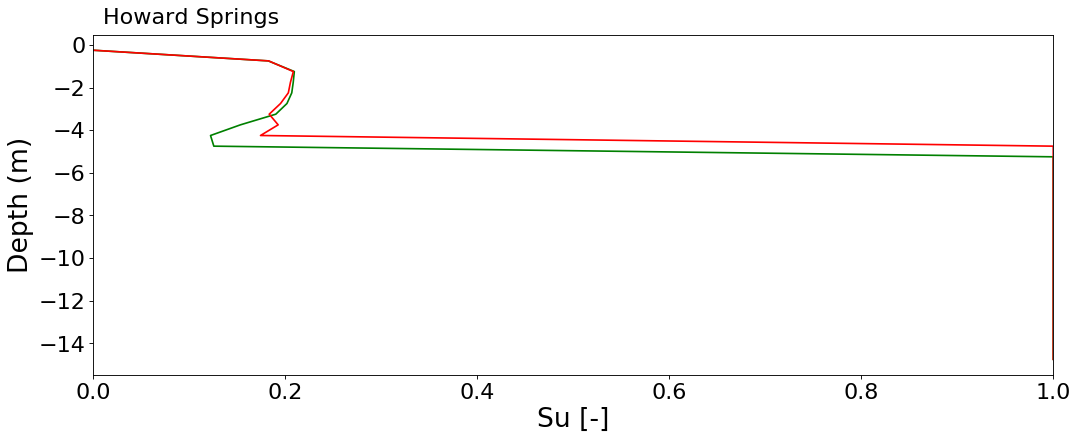

In [119]:
#HowardSprings
%run ../../src_py/plot_smprofile.py  \
-i  ../../data/VOM_output/additional_analyses/comp2015/1_benchmark_repr/sce_best/su_hourly.txt \
../../data/VOM_output/additional_analyses/comp2015/2_sce_check/sce_best/su_hourly.txt \
-cz 15 15 -nd 3650 --ylabel "Depth (m)" --xlabel "Su [-]"  -d 0.50 0.50 --xlim 0 1 --title "Howard Springs" \
--colors "green" "red" --labels "2015" "2-sce"

